In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
me = pd.read_csv('/home/francesco/l2_activation.csv', header=None)
he = pd.read_csv('/home/francesco/l2_inactivation.csv', header=None)

tact_e = pd.read_csv('/home/francesco/l2_t09pke.csv', header=None)
tact_e[0] = np.arange(-45, 0, 10)
tact_e[1] /= np.log(10)

tinact_e = pd.read_csv('/home/francesco/tinacte.csv', header=None)
tinact_e[0] = np.arange(-45, 0, 10)

In [3]:
def calculate(v, gm=1.0, km=11, vhm=-24.4, gh=0.87, kh=6.4, vhh=-55.5, t09pk=1.4, ljp=3.7, tauh0=6.52):
    taum0 = t09pk / np.log(10)
    am0 = bm0 = 1 / (2 * taum0)
    ah0 = bh0 = 1 / (2 * tauh0)
    vhm -= ljp
    vhh -= ljp
    am = am0 * np.exp(gm / km * (v - vhm))
    bm = bm0 * np.exp((gm - 1) / km * (v - vhm))
    ah = ah0 * np.exp(-gh / kh * (v - vhh))
    bh = bh0 * np.exp(-(gh - 1) / kh * (v - vhh))
    tm = 1 / (am + bm)
    th = 1 / (ah + bh)
    m = am / (am + bm)
    h = ah / (ah + bh)
    return tm, th, m, h

In [4]:
v = np.arange(-90, 90)
tm, th, m, h = calculate(v, ljp=0)

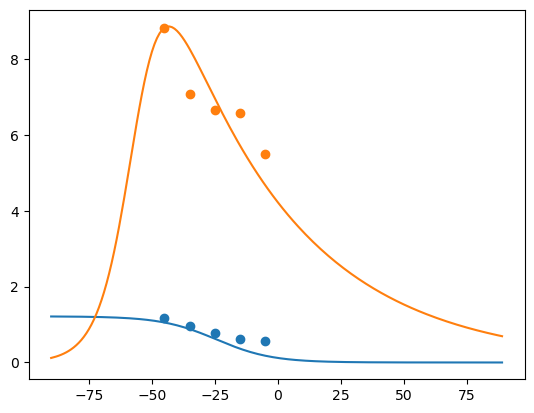

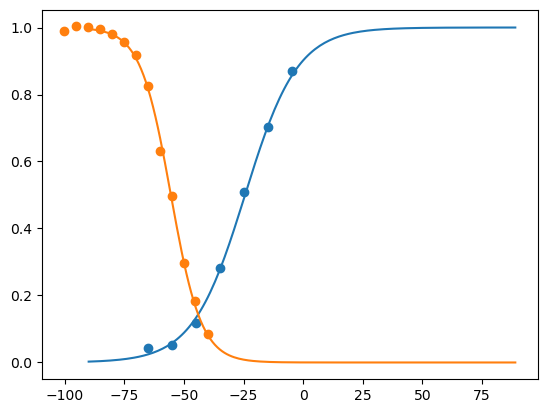

In [5]:
plt.scatter(tact_e[0], tact_e[1])
plt.scatter(tinact_e[0], tinact_e[1])
v = np.arange(-90, 90)
tm, th, m, h = calculate(v, ljp=0)
plt.plot(v, tm)
plt.plot(v, th)
plt.show()

plt.plot(v, m)
plt.plot(v, h)
plt.scatter(me[0], me[1])
plt.scatter(he[0], he[1])
plt.show()

In [8]:
allk = np.arange(8, 15.0, 0.1)
allvh = np.arange(-35, -15.0, 1)
allg = np.arange(0.0, 1.1, 0.1)
allt0 = np.arange(0.1, 3, 0.1)
vt = tact_e[0].values

In [26]:
err_m = {
    't09pk':list(),
    'g':list(),
    'k':list(),
    'vh':list(),
    'terr':list(),
    'err':list()
}

allv = np.concatenate((vt, me[0].to_numpy()))

for k in allk:
    for vh in allvh:
        for g in allg:
            for t0 in allt0:
                err_m['t09pk'].append(t0)
                err_m['g'].append(g)
                err_m['vh'].append(vh)
                err_m['k'].append(k)
                
                tm, _, m, _ = calculate(allv, ljp=0, t09pk=t0, gm=g, km=k, vhm=vh)
                tm = tm[:vt.size]
                m = m[vt.size:]
                err_m['terr'].append(float(np.mean(np.abs(tm - tact_e[1]) / tact_e[1])))
                err_m['err'].append(float(np.mean(np.abs(m - me[1]) / me[1])))

err_m = pd.DataFrame(err_m)

In [27]:
err_m[['t09pk', 'g', 'k', 'vh']] = err_m[['t09pk', 'g', 'k', 'vh']].map(lambda x : round(x, 1))

In [54]:
2.5 / np.log(10)

np.float64(1.0857362047581294)

In [28]:
err_m.loc[err_m['err'].argmin(), :]

t09pk     2.500000
g         0.200000
k        10.400000
vh      -25.000000
terr      0.741103
err       0.093239
Name: 156392, dtype: float64

In [45]:
err_m.loc[err_m.loc[(err_m.vh == -25) & (err_m.k == 10.4), 'terr'].idxmin(), :]

t09pk     2.000000
g         0.700000
k        10.400000
vh      -25.000000
terr      0.148884
err       0.093239
Name: 156532, dtype: float64

In [46]:
allk = np.arange(5.0, 10.0, 0.1)
allvh = np.arange(-65, -45.0, 1)
allg = np.arange(0.5, 1.1, 0.1)
allt0 = np.arange(4, 8, 0.1)

In [47]:
err_h = {
    'tau0':list(),
    'g':list(),
    'k':list(),
    'vh':list(),
    'terr':list(),
    'err':list()
}

allv = np.concatenate((vt, he[0].to_numpy()))

for k in allk:
    for vh in allvh:
        for g in allg:
            for t0 in allt0:
                err_h['tau0'].append(t0)
                err_h['g'].append(g)
                err_h['vh'].append(vh)
                err_h['k'].append(k)
                
                _, th, _, h = calculate(allv, ljp=0, tauh0=t0, gh=g, kh=k, vhh=vh)
                th = th[:vt.size]
                h = h[vt.size:]
                err_h['terr'].append(float(np.mean(np.abs(th - tinact_e[1]) / tinact_e[1])))
                err_h['err'].append(float(np.mean(np.abs(h - he[1]) / he[1])))

err_h = pd.DataFrame(err_h)

In [49]:
err_h[['tau0', 'g', 'k', 'vh']] = err_h[['tau0', 'g', 'k', 'vh']].map(lambda x : round(x, 1))

In [50]:
err_h.loc[err_h['err'].argmin(), :]

tau0     4.200000
g        0.600000
k        6.400000
vh     -55.000000
terr     0.777820
err      0.020811
Name: 81242, dtype: float64

In [52]:
err_h.loc[err_h.loc[(err_h.vh == -55) & (err_h.k == 6.4), 'terr'].idxmin(), :]

tau0     6.000000
g        0.900000
k        6.400000
vh     -55.000000
terr     0.073828
err      0.020811
Name: 81380, dtype: float64

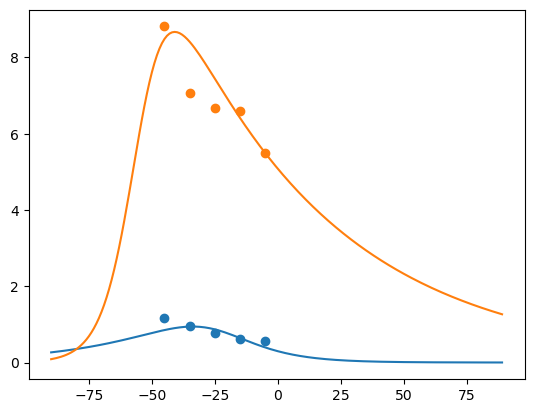

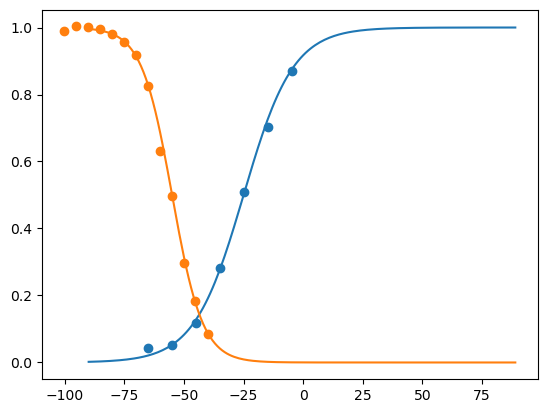

In [53]:
plt.scatter(tact_e[0], tact_e[1])
plt.scatter(tinact_e[0], tinact_e[1])
v = np.arange(-90, 90)
tm, th, m, h = calculate(v, ljp=0, 
                         tauh0=6, gh=0.9, vhh=-55, kh=6.4, 
                         t09pk=2.0, gm=0.7, vhm=-25, km=10.4)
plt.plot(v, tm)
plt.plot(v, th)
plt.show()

plt.plot(v, m)
plt.plot(v, h)
plt.scatter(me[0], me[1])
plt.scatter(he[0], he[1])
plt.show()